# Examen 3

Nombre: 

### Física Computacional 2023-2


Resuelva los siguientes ejercicios.

1. Se tiene la ecuación diferencial para $P(t)$

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{P_1} \right)\left( 1 - \frac{P}{P_2} \right)
$$

donde $r$, $P_1$ y $P_2$ son constantes positivas. Genere una función que se pueda utilizar para realizar una integración numérica de la ecuación diferencial y que además tenga como argumentos opcionales las dos constantes anteriores.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dPdt(P, t, r, P1, P2):
    return r * P * (1 - P / P1) * (1 - P / P2)

def integrar_edo(r, P1, P2, P0, t_inicial, t_final, num_puntos):

    tiempos = np.linspace(t_inicial, t_final, num_puntos)
    
    solucion = odeint(dPdt, P0, tiempos, args=(r, P1, P2))
    
    return solucion[:, 0], tiempos




2. Utilice la función [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) de scipy para encontrar la solución numérica de la ecuación anterior para $r=0.6$, $P_1 = 12$, $P_2 = 20$ y las condiciones iniciales $P(0) = \{1,3,5, ... 25 \}$

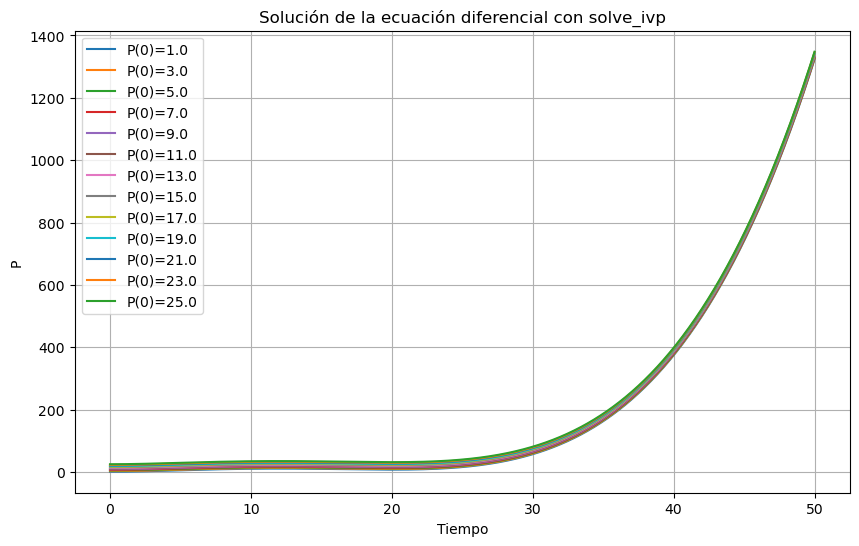

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


r = 0.6
P1 = 12
P2 = 20
condiciones_iniciales = np.arange(1, 26, 2)  # P(0) = {1, 3, 5, ..., 25}


soluciones = []
for P0 in condiciones_iniciales:
    solucion = solve_ivp(dPdt, [0, 50], [P0], args=(r, P1, P2), dense_output=True)
    soluciones.append(solucion)

plt.figure(figsize=(10, 6))
for solucion in soluciones:
    t = np.linspace(0, 50, 1000)
    P = solucion.sol(t)
    plt.plot(t, P[0], label=f'P(0)={solucion.y[0, 0]}')
plt.xlabel('Tiempo')
plt.ylabel('P')
plt.title('Solución de la ecuación diferencial con solve_ivp')
plt.legend()
plt.grid(True)
plt.show()


3. Suponga el caso en el que $P_2 \to \infty ^+$ y que $P(0)=5$ del problema anterior. Encuentre la máxima diferencia dicha solución y la función
$$
P(t) = \frac{ 60e^{3t/5} }{ 7+5e^{3t/5}}
$$

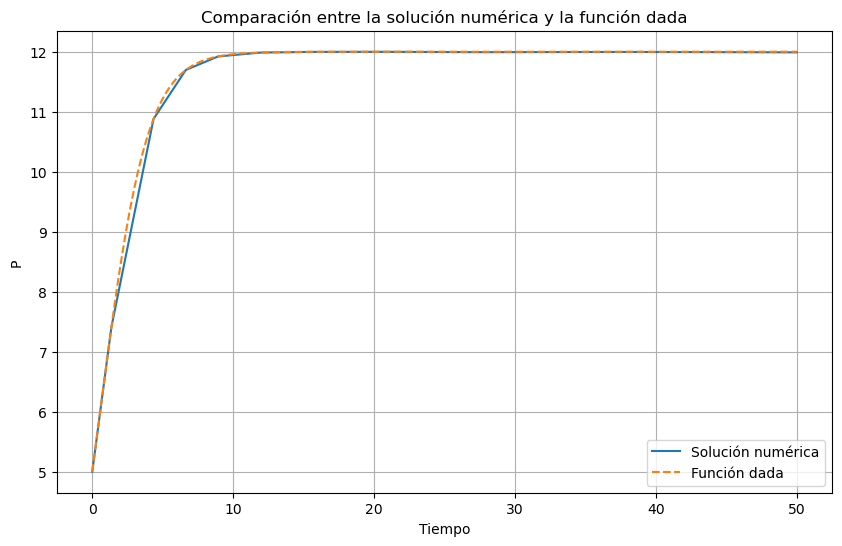

Máxima diferencia: 0.010319854320982813 en t = 50.0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def dPdt(t, P, r, P1):
    return r * P * (1 - P / P1)

# Constantes
r = 0.6
P1 = 12
P0 = 5


sol_infinito = solve_ivp(dPdt, [0, 50], [P0], args=(r, P1))


def P_func(t):
    return 60 * np.exp(3 * t / 5) / (7 + 5 * np.exp(3 * t / 5))


t = np.linspace(0, 50, 1000)
diferencia = np.abs(sol_infinito.y[0] - P_func(sol_infinito.t))


max_diferencia = np.max(diferencia)
indice_max_diferencia = np.argmax(diferencia)
t_max_diferencia = sol_infinito.t[indice_max_diferencia]


plt.figure(figsize=(10, 6))
plt.plot(sol_infinito.t, sol_infinito.y[0], label='Solución numérica')
plt.plot(t, P_func(t), label='Función dada', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('P')
plt.title('Comparación entre la solución numérica y la función dada')
plt.legend()
plt.grid(True)
plt.show()

print(f"Máxima diferencia: {max_diferencia} en t = {t_max_diferencia}")


$\mathbb{B} \hat u \dot e \eta \alpha$   $\;\;$ $\sum \hat u \dot e \rho \tau \dot e$